In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/employees.csv')
data.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


In [4]:
print(data)

    First Name  Gender  Start Date Last Login Time  Salary  Bonus %  \
0      Douglas    Male    8/6/1993        12:42 PM   97308    6.945   
1       Thomas    Male   3/31/1996         6:53 AM   61933    4.170   
2        Maria  Female   4/23/1993        11:17 AM  130590   11.858   
3        Jerry    Male    3/4/2005         1:00 PM  138705    9.340   
4        Larry    Male   1/24/1998         4:47 PM  101004    1.389   
..         ...     ...         ...             ...     ...      ...   
995      Henry     NaN  11/23/2014         6:09 AM  132483   16.655   
996    Phillip    Male   1/31/1984         6:30 AM   42392   19.675   
997    Russell    Male   5/20/2013        12:39 PM   96914    1.421   
998      Larry    Male   4/20/2013         4:45 PM   60500   11.985   
999     Albert    Male   5/15/2012         6:24 PM  129949   10.169   

    Senior Management                  Team  
0                True             Marketing  
1                True                   NaN  
2        

In [3]:
cleaned_data = data.dropna() #dropna --> drop missing columns, dropna() --> default rows
print(cleaned_data)


    First Name  Gender Start Date Last Login Time  Salary  Bonus %  \
0      Douglas    Male   8/6/1993        12:42 PM   97308    6.945   
2        Maria  Female  4/23/1993        11:17 AM  130590   11.858   
3        Jerry    Male   3/4/2005         1:00 PM  138705    9.340   
4        Larry    Male  1/24/1998         4:47 PM  101004    1.389   
5       Dennis    Male  4/18/1987         1:35 AM  115163   10.125   
..         ...     ...        ...             ...     ...      ...   
994     George    Male  6/21/2013         5:47 PM   98874    4.479   
996    Phillip    Male  1/31/1984         6:30 AM   42392   19.675   
997    Russell    Male  5/20/2013        12:39 PM   96914    1.421   
998      Larry    Male  4/20/2013         4:45 PM   60500   11.985   
999     Albert    Male  5/15/2012         6:24 PM  129949   10.169   

    Senior Management                  Team  
0                True             Marketing  
2               False               Finance  
3                True

In [34]:
filled_data = cleaned_data.fillna(0)
filled_data = filled_data[(filled_data != 0).all(axis=1)]
print(filled_data)


    First Name  Gender  Start Date Last Login Time  Salary  Bonus %  \
0      Douglas    Male    8/6/1993        12:42 PM   97308    6.945   
3        Jerry    Male    3/4/2005         1:00 PM  138705    9.340   
4        Larry    Male   1/24/1998         4:47 PM  101004    1.389   
6         Ruby  Female   8/17/1987         4:20 PM   65476   10.012   
8       Angela  Female  11/22/2005         6:29 AM   95570   18.523   
..         ...     ...         ...             ...     ...      ...   
991       Rose  Female   8/25/2002         5:12 AM  134505   11.051   
992    Anthony    Male  10/16/2011         8:35 AM  112769   11.625   
993       Tina  Female   5/15/1997         3:53 PM   56450   19.040   
994     George    Male   6/21/2013         5:47 PM   98874    4.479   
999     Albert    Male   5/15/2012         6:24 PM  129949   10.169   

     Senior Management             Team  
0                 True        Marketing  
3                 True          Finance  
4                 Tru

<ipython-input-34-14155242416c>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  filled_data = cleaned_data.fillna(0)


<ipython-input-37-ea215de0554d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=filled_data, palette='viridis')


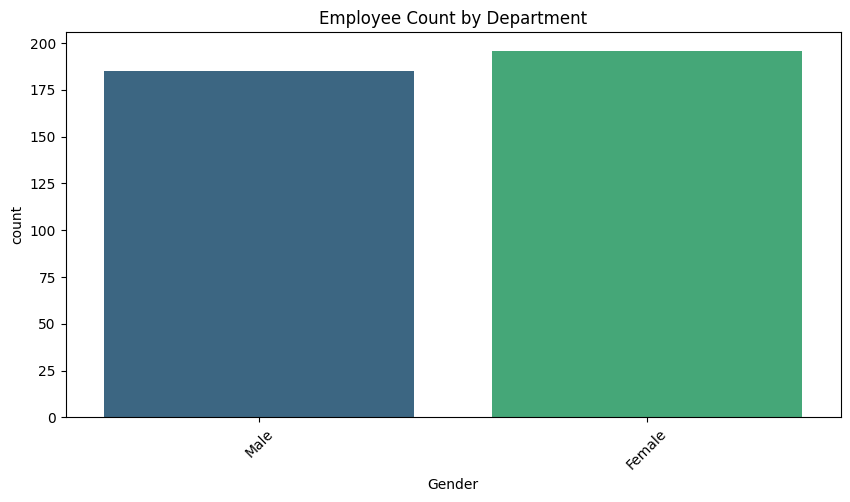

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(x='Gender', data=filled_data, palette='viridis')
plt.xticks(rotation=45)
plt.title('Employee Count by Department')
plt.show()



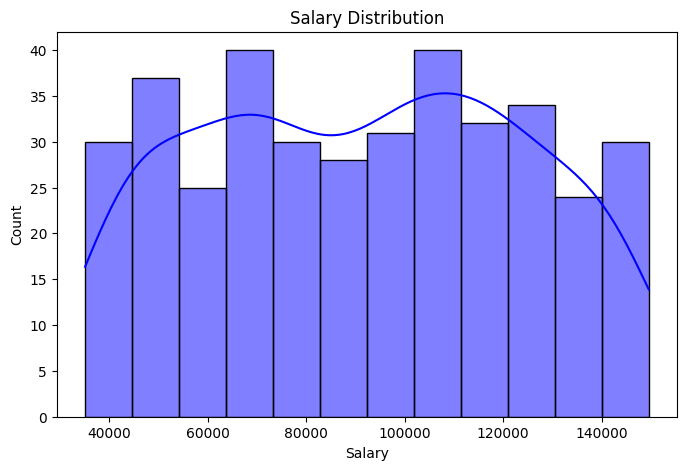

In [26]:
plt.figure(figsize=(8,5))
sns.histplot(filled_data['Salary'], bins=12, kde=True, color='blue')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()


<Figure size 1000x600 with 0 Axes>

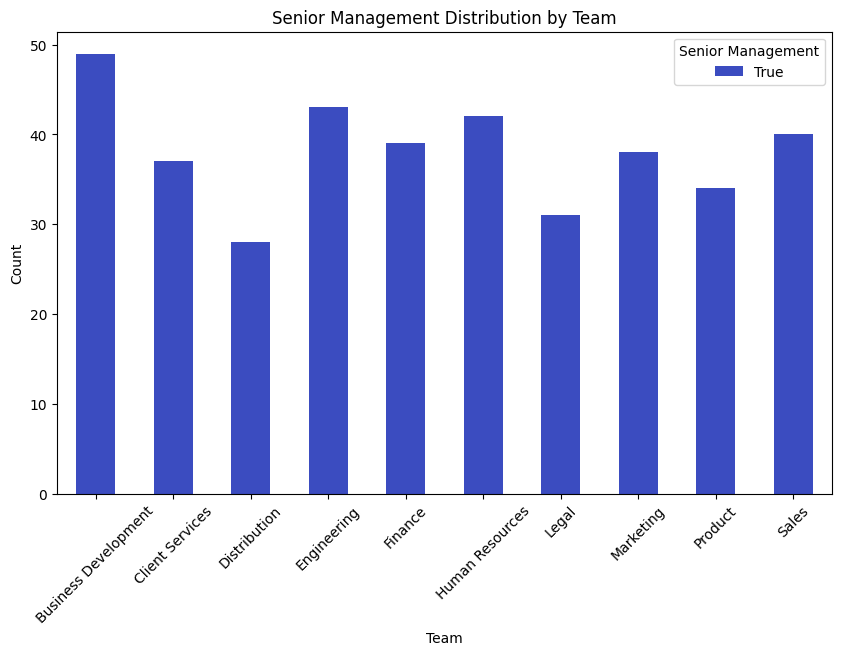

In [57]:
plt.figure(figsize=(10,6))
senior_mgmt_counts = filled_data.groupby(['Team', 'Senior Management']).size().unstack()

# Stacked bar chart
senior_mgmt_counts.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(10,6))
plt.xlabel("Team")
plt.ylabel("Count")
plt.title("Senior Management Distribution by Team")
plt.xticks(rotation=45)
plt.legend(title="Senior Management")
plt.show()


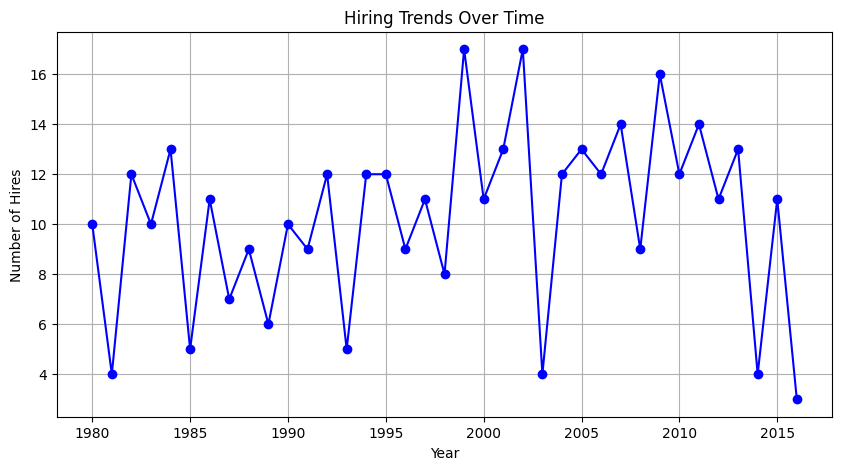

In [56]:

# Convert 'Start Date' to datetime
filled_data['Start Date'] = pd.to_datetime(filled_data['Start Date'])

# Count hires per year
filled_data['Year'] = filled_data['Start Date'].dt.year
hiring_trends = filled_data['Year'].value_counts().sort_index()

# Plot hiring trends
plt.figure(figsize=(10,5))
plt.plot(hiring_trends.index, hiring_trends.values, marker='o', linestyle='-', color='blue')
plt.xlabel("Year")
plt.ylabel("Number of Hires")
plt.title("Hiring Trends Over Time")
plt.grid(True)
plt.show()

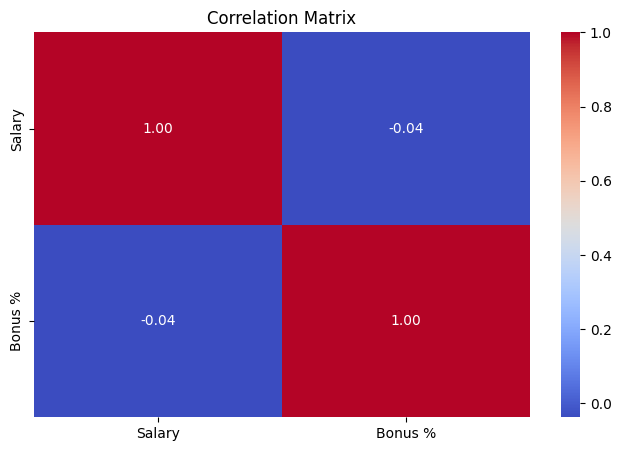

In [43]:
# Select only numeric columns
numeric_data = filled_data.select_dtypes(include=['number'])

# Plot correlation heatmap
plt.figure(figsize=(8,5))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



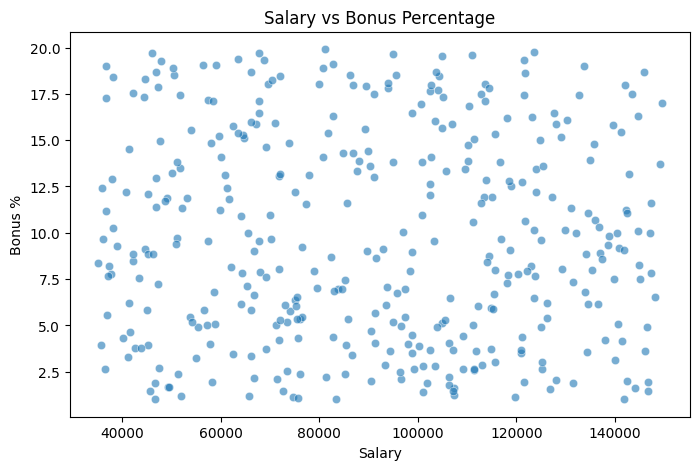

In [27]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=filled_data['Salary'], y=filled_data['Bonus %'], alpha=0.6)
plt.title('Salary vs Bonus Percentage')
plt.xlabel('Salary')
plt.ylabel('Bonus %')
plt.show()


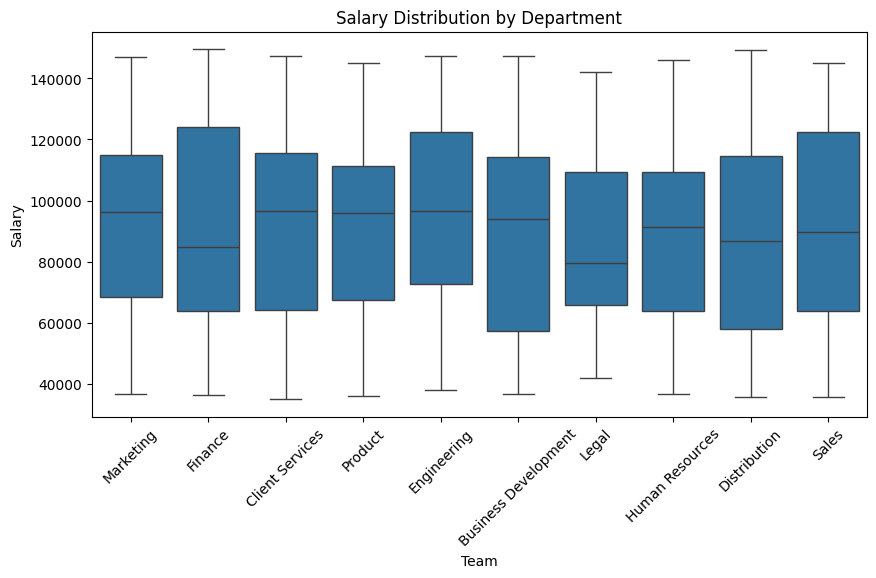

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Team', y='Salary', data=filled_data)
plt.xticks(rotation=45)
plt.title('Salary Distribution by Department')
plt.show()


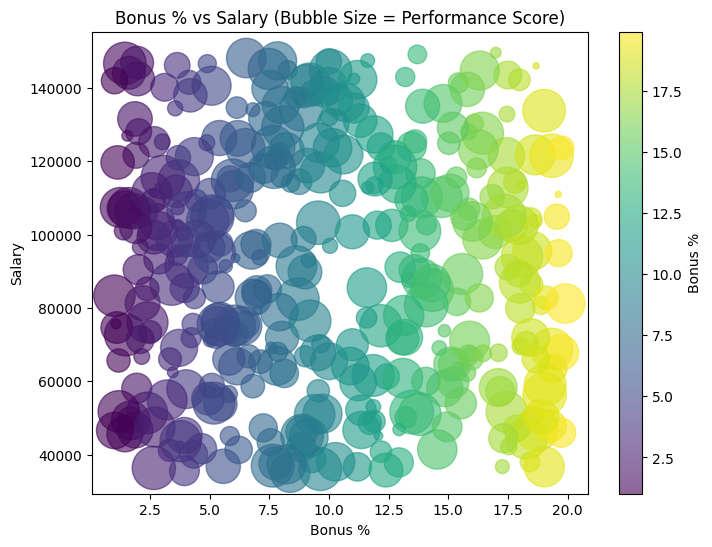

In [32]:
x = filled_data['Bonus %']
y = filled_data['Salary']
colors = filled_data['Bonus %']
sizes = 10 * np.random.randint(100, size=len(filled_data))

plt.figure(figsize=(8,6))
plt.scatter(x, y, c=colors, s=sizes, alpha=0.6, cmap='viridis')
plt.colorbar(label="Bonus %")
plt.xlabel("Bonus %")
plt.ylabel("Salary")
plt.title("Bonus % vs Salary (Bubble Size = Performance Score)")
plt.show()